In [1]:
import librosa
import os
import numpy as np
import scipy.signal as signal

In [2]:
%matplotlib inline

In [3]:
from oct2py import octave
def stackfeat(spec, N):
    octave.addpath("./")
    y=octave.stackfeat(spec, N)
    return y

In [14]:
speech_dict = []

sr = 16000
frame_length = int(25.0/1000.0 * sr)
frame_shift = int(10.0/1000.0 * sr)

for root, dirs, files in os.walk("/trainman-mount/trainman-storage-dc5e03f8-a08d-49bb-b3a9-4bae92eb4e92/clean/"):
    for file in files:
        if file[1:3]!="10" or file[-11:-10]=="5":
            continue
        print(file)
        y, _ = librosa.load(os.path.join(root, file), sr=sr, mono=True)
        y = y[80000:]
        
#         _, _, spec = signal.spectrogram(y, sr, noverlap=frame_shift, nperseg=frame_length, nfft=512, 
#                                         mode="magnitude", return_onesided=True)
        spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
        print(spec.shape)
        
        stacked_spec = stackfeat(spec, 10)
        print(stacked_spec.shape)
        
        rands = np.random.randint(0, stacked_spec.shape[-1], 500)
        speech_dict.append(stacked_spec[:, rands])

m10_script4_clean.wav
(257, 16933)
(2570, 16924)
f10_script3_clean.wav
(257, 17023)
(2570, 17014)
m10_script2_clean.wav
(257, 21921)
(2570, 21912)
f10_script1_clean.wav
(257, 16755)
(2570, 16746)
m10_script1_clean.wav
(257, 18797)
(2570, 18788)
f10_script4_clean.wav
(257, 13773)
(2570, 13764)
m10_script3_clean.wav
(257, 19384)
(2570, 19375)
f10_script2_clean.wav
(257, 17604)
(2570, 17595)


In [15]:
# speech_dict_concat_2 = np.concatenate(speech_dict, axis=-1)
# speech_dict_concat = np.concatenate([speech_dict_concat, speech_dict_concat_2], axis=-1)

speech_dict_concat = np.concatenate(speech_dict, axis=-1)
print(speech_dict_concat.shape)

(2570, 4000)


In [16]:
np.save("speech_dict_2570_all.npy", speech_dict_concat)

In [17]:
np.savetxt("speech_dict_2570_all.csv", speech_dict_concat, delimiter=",")

In [14]:
!mv noise_dict_* noise_dicts

In [10]:
!zip -r test_dicts.zip test_dicts

  adding: test_dicts/ (stored 0%)
  adding: test_dicts/test_dict_257_wiener_denoised_f10_script5_iphone_bedroom1.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_m10_script5_ipad_office1.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_f10_script5_ipad_office2.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_f10_script5_ipadflat_office1.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_f10_script5_iphone_balcony1.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_f10_script5_ipadflat_confroom1.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_m10_script5_ipad_balcony1.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_m10_script5_iphone_balcony1.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_f10_script5_ipad_livingroom1.csv (deflated 57%)
  adding: test_dicts/test_dict_257_wiener_denoised_f10_script5_iphone_livingroom1.csv (

In [ ]:
sr = 16000
frame_length = int(25.0/1000.0 * sr)
frame_shift = int(10.0/1000.0 * sr)

for root, dirs, files in os.walk("/home/code-base/runtime/experiments/wiener_outputs"):
    print(root)
#     if os.path.exists("noise_dict_1000_"+(root.split("/")[-1])+".csv"):
#         continue
    for file in files:
        noise_dict = []
        if not file.startswith("wiener_denoised"):
            continue
        y, _ = librosa.load(os.path.join(root, file), sr=sr, mono=True)
        y = y[:80000]
        spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
        print(spec.shape)
        
        stacked_spec = stackfeat(spec, 10)
        print(file, stacked_spec.shape)
        
        rands = np.random.randint(0, stacked_spec.shape[-1], 10)
        noise_dict.append(stacked_spec[:, rands])

        noise_dict_concat = np.concatenate(noise_dict, axis=-1)
        print(noise_dict_concat.shape, file.split(".")[0])
        
        np.savetxt("noise_dict_2570_"+(file.split(".")[0])+".csv", noise_dict_concat, delimiter=",")

In [4]:
sr = 16000
frame_length = int(25.0/1000.0 * sr)
frame_shift = int(10.0/1000.0 * sr)

for root, dirs, files in os.walk("/home/code-base/runtime/experiments/wiener_outputs"):
    print(root)
    noise_dict = []
    for file in files:
        if not file.startswith("wiener_denoised"):
            continue
        y, _ = librosa.load(os.path.join(root, file), sr=sr, mono=True)
#         y = y[:80000]
        spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
        print(spec.shape, file.split(".")[0])
        np.savetxt("test_dict_257_"+(file.split(".")[0])+".csv", spec, delimiter=",")

/home/code-base/runtime/experiments/wiener_outputs
(257, 19425) wiener_denoised_m10_script5_ipad_balcony1
(257, 15913) wiener_denoised_f10_script5_ipadflat_office1
(257, 19425) wiener_denoised_m10_script5_ipadflat_confroom1
(257, 19425) wiener_denoised_m10_script5_ipadflat_office1
(257, 15913) wiener_denoised_f10_script5_ipadflat_confroom1
(257, 19425) wiener_denoised_m10_script5_ipad_office1
(257, 19425) wiener_denoised_m10_script5_ipad_confroom1
(257, 15913) wiener_denoised_f10_script5_ipad_confroom1
(257, 19425) wiener_denoised_m10_script5_iphone_livingroom1
(257, 15913) wiener_denoised_f10_script5_iphone_balcony1
(257, 15913) wiener_denoised_f10_script5_ipad_balcony1
(257, 19425) wiener_denoised_m10_script5_ipad_confroom2
(257, 15913) wiener_denoised_f10_script5_clean
(257, 19425) wiener_denoised_m10_script5_ipad_office2
(257, 15913) wiener_denoised_f10_script5_ipad_office2
(257, 15913) wiener_denoised_f10_script5_ipad_livingroom1
(257, 19425) wiener_denoised_m10_script5_clean
(257

In [ ]:
sr = 16000
frame_length = int(25.0/1000.0 * sr)
frame_shift = int(10.0/1000.0 * sr)

for root, dirs, files in os.walk("/trainman-mount/trainman-storage-420a420f-b7a2-4445-abca-0081fc7108ca/AM_daps_input/"):
    print(root)
#     if os.path.exists("noise_dict_1000_"+(root.split("/")[-1])+".csv"):
#         continue
    noise_dict = []
    for file in files:
        y, _ = librosa.load(os.path.join(root, file), sr=sr, mono=True)
        y = y[:80000]
        spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
#         print(spec.shape)
        
        stacked_spec = stackfeat(spec, 10)
        print(file, stacked_spec.shape)
        
        rands = np.random.randint(0, stacked_spec.shape[-1], 10)
        noise_dict.append(stacked_spec[:, rands])
    if len(noise_dict)>0:
        noise_dict_concat = np.concatenate(noise_dict, axis=-1)
        print(noise_dict_concat.shape)
        np.savetxt("noise_dict_1000_"+(root.split("/")[-1])+".csv", noise_dict_concat, delimiter=",")

In [ ]:
noise_dict = []

sr = 16000
frame_length = int(25.0/1000.0 * sr)
frame_shift = int(10.0/1000.0 * sr)

for root, dirs, files in os.walk("/trainman-mount/trainman-storage-420a420f-b7a2-4445-abca-0081fc7108ca/subnoises_2/"):
    for file in files:
        print(file)
        y, _ = librosa.load(os.path.join(root, file), sr=sr, mono=True)
        spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
        print(spec.shape)
        
        stacked_spec = stackfeat(spec, 10)
        print(stacked_spec.shape)
        
        rands = np.random.randint(0, stacked_spec.shape[-1], 50)
        noise_dict.append(stacked_spec[:, rands])

In [19]:
# noise_dict_concat_2 = np.concatenate(noise_dict, axis=-1)
# noise_dict_concat = np.concatenate([noise_dict_concat, noise_dict_concat_2], axis=-1)
noise_dict_concat = np.concatenate(noise_dict, axis=-1)
print(noise_dict_concat.shape)

(2570, 2900)


In [20]:
np.save("noise_dict_2570_all.npy", noise_dict_concat)

In [21]:
np.savetxt("noise_dict_2570_all.csv", noise_dict_concat, delimiter=",")

In [115]:
test_dict = []

sr = 16000
frame_length = int(25.0/1000.0 * sr)
frame_shift = int(10.0/1000.0 * sr)

for root, dirs, files in os.walk("/trainman-mount/trainman-storage-420a420f-b7a2-4445-abca-0081fc7108ca/AM_daps_input/"):
    for file in files:
        if file.startswith("f10_script5") or file.startswith("m10_script5"):
            print(file)
            y, _ = librosa.load(os.path.join(root, file), sr=sr, mono=True)
            spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
            print(spec.shape)
            spec = spec[:, 900:1000]

            np.savetxt("/trainman-mount/trainman-storage-420a420f-b7a2-4445-abca-0081fc7108ca/test_dict_257_"+(file.split(".")[0])+".csv", spec, delimiter=",")

# y, _ = librosa.load("/trainman-mount/trainman-storage-dc5e03f8-a08d-49bb-b3a9-4bae92eb4e92/ipad_office1/f10_script5_ipad_office1.wav", 
#                     sr=sr, mono=True)
# y = y[80000:]
# spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
# print(spec.shape)

m10_script5_ipadflat_confroom1.wav
(257, 19425)
f10_script5_ipadflat_confroom1.wav
(257, 15913)
m10_script5_ipad_livingroom1.wav
(257, 19425)
f10_script5_ipad_livingroom1.wav
(257, 15913)
m10_script5_ipad_confroom2.wav
(257, 19425)
f10_script5_ipad_confroom2.wav
(257, 15913)
m10_script5_ipad_office1.wav
(257, 19425)
f10_script5_ipad_office1.wav
(257, 15913)
m10_script5_ipad_balcony1.wav
(257, 19425)
f10_script5_ipad_balcony1.wav
(257, 15913)
m10_script5_ipad_bedroom1.wav
(257, 19425)
f10_script5_ipad_bedroom1.wav
(257, 15913)
f10_script5_ipadflat_office1.wav
(257, 15913)
m10_script5_ipadflat_office1.wav
(257, 19425)
f10_script5_ipad_confroom1.wav
(257, 15913)
m10_script5_ipad_confroom1.wav
(257, 19425)
f10_script5_iphone_livingroom1.wav
(257, 15913)
m10_script5_iphone_livingroom1.wav
(257, 19425)
f10_script5_clean.wav
(257, 15913)
m10_script5_clean.wav
(257, 19425)
f10_script5_ipad_office2.wav
(257, 15913)
m10_script5_ipad_office2.wav
(257, 19425)
f10_script5_iphone_balcony1.wav
(257, 

In [39]:
np.savetxt("test_dict_2570.csv", spec, delimiter=",")

In [78]:
import numpy as np
test_rir = np.genfromtxt('test_rir_all.csv', delimiter=',')

In [79]:
print(test_rir.shape)

(257, 10)


In [ ]:
!ls /trainman-mount/trainman-storage-420a420f-b7a2-4445-abca-0081fc7108ca/noise_free_simulation

In [ ]:
test_sim_dict = []

indices = np.load("/trainman-mount/trainman-storage-420a420f-b7a2-4445-abca-0081fc7108ca/blend2_eval_subset_ids.npy")

print(len(indices))
print(sorted(indices))

sr = 16000
frame_length = int(25.0/1000.0 * sr)
frame_shift = int(10.0/1000.0 * sr)

count = 0
for root, dirs, files in os.walk("/trainman-mount/trainman-storage-420a420f-b7a2-4445-abca-0081fc7108ca/noise_free_simulation/"):
    for file in files:
        if file.startswith("f10_script5") or file.startswith("m10_script5"):
            if int(file.split(".wav")[0].split("_")[-1]) in indices:
                count = count+1
                print(file)
                y, _ = librosa.load(os.path.join(root, file), sr=sr, mono=True)
                spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
                print(spec.shape)
                spec = spec[:, 900:1000]
                np.savetxt("/trainman-mount/trainman-storage-420a420f-b7a2-4445-abca-0081fc7108ca/test_sim_dict_257_"+(file.split(".")[0])+".csv", spec, delimiter=",")
print(count)
# y, _ = librosa.load("/trainman-mount/trainman-storage-dc5e03f8-a08d-49bb-b3a9-4bae92eb4e92/ipad_office1/f10_script5_ipad_office1.wav", 
#                     sr=sr, mono=True)
# y = y[80000:]
# spec = np.abs(librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512))
# print(spec.shape)

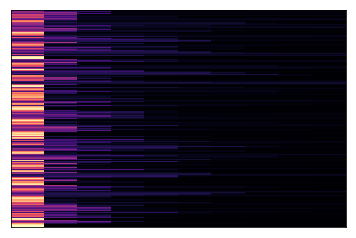

In [80]:
import librosa.display
librosa.display.specshow(test_rir)

In [50]:
def mag2wav(mag_spec, hop_length, win_length, random_phase=True, ref_phase=None):
    if ref_phase is not None:
        noisy_sig = librosa.core.istft(mag_spec*ref_phase, hop_length=hop_length, win_length=win_length)
    elif random_phase:
        random_phase_spec = generate_random_phase(mag_spec.shape)
        noisy_sig = librosa.core.istft(mag_spec*random_phase_spec, hop_length=hop_length, win_length=win_length)
    else:
        noisy_sig = librosa.core.griffinlim(mag_spec, n_iter=1000, hop_length=hop_length, win_length=win_length) 
    return noisy_sig

In [81]:
test_rir_wav = mag2wav(test_rir, hop_length=frame_shift, win_length=frame_length, random_phase=False)

In [82]:
import IPython.display
IPython.display.display(IPython.display.Audio(test_rir_wav, rate=16000))

In [75]:
y, _ = librosa.core.load("/trainman-mount/trainman-storage-dc5e03f8-a08d-49bb-b3a9-4bae92eb4e92/ipad_office1/f10_script5_ipad_office1.wav", sr=16000)
clean_y, _ = librosa.core.load("/trainman-mount/trainman-storage-dc5e03f8-a08d-49bb-b3a9-4bae92eb4e92/clean/f10_script5_clean.wav", sr=16000)

In [83]:
result = np.convolve(clean_y[80000:160000], test_rir_wav)

In [84]:
IPython.display.display(IPython.display.Audio(result[:80000] + y[:80000], rate=16000))
IPython.display.display(IPython.display.Audio(y[80000:], rate=16000))

In [85]:
import soundfile
soundfile.write("NMD_predict_all_ipad_office1.wav", result[:80000] + y[:80000], 16000)
soundfile.write("NMD_target_all_ipad_office1.wav", y[80000:160000], 16000)

In [94]:
import numpy as np
activations = np.genfromtxt('activations/activations_wiener_denoised_f10_script5_ipad_office1.csv', delimiter=',')

In [95]:
speech_activations = activations[:4000, :]
print(speech_activations.shape, activations.shape)

(4000, 100) (6910, 100)


In [96]:
mixed_speech = np.dot(speech_dict_concat, speech_activations)
# mixed_speech = np.dot(np.concatenate([speech_dict_concat, noise_dict_concat], axis=-1), activations[:6900, :])

In [97]:
mixed_speech.shape

(2570, 100)

In [110]:
empty_matrix = np.zeros((257, 110))
for i in range(100):
    empty_matrix[:, i:i+10]+= mixed_speech[:, i].T.reshape((10, -1)).T

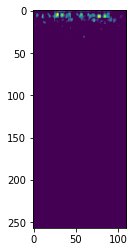

In [115]:
import matplotlib.pyplot as plt
plt.imshow(np.maximum(np.log(empty_matrix + 1e-6), -6))

# plt.imshow(np.maximum(np.log(spec[:, :100] + 1e-6), -6))
# plt.imshow(np.maximum(np.log(empty_matrix[:, 5:105] + 1e-6) - np.log(spec[:, :100] + 1e-6), -6))

In [100]:
y, _ = librosa.load(os.path.join("/home/code-base/runtime/experiments/wiener_outputs", 
                                 "activations_wiener_denoised_f10_script5_ipad_office1.wav"), sr=sr, mono=True)
comp_spec = librosa.stft(y, hop_length=frame_shift, win_length=frame_length, n_fft=512)
spec = np.abs(comp_spec)
phase = np.angle(comp_spec)

In [101]:
energy_ratio = empty_matrix[:, 5:105] / spec[:, :100]

In [102]:
denoised_comp_spec = energy_ratio * comp_spec[:, :100]

In [103]:
denoised_sig = librosa.istft(empty_matrix[:, 5:105] * phase[:, :100], hop_length=frame_shift, win_length=frame_length)
# denoised_sig = librosa.istft(denoised_comp_spec, hop_length=frame_shift, win_length=frame_length)

In [104]:
import IPython
IPython.display.display(IPython.display.Audio(denoised_sig, rate=16000))

In [ ]:
empty_matrix